## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, I showed how to use k-Means for customer segmentation.

Some real-world applications of k-means:

*   Customer segmentation
*   Understand what the visitors of a website are trying to accomplish
*   Pattern recognition
*   Machine learning
*   Data compression

In this notebook practice k-means clustering with Using k-means for customer segmentation.

### Import libraries

Let's first import the required libraries.


In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

%matplotlib inline

### Load Data From CSV File


In [8]:

cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


### pre-processing
As you can see, **Address** in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.

In [9]:
cust_df.drop(labels='Address',
    axis= 1,inplace=True)

In [10]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [11]:
cust_df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [12]:
cust_df['Defaulted'].fillna(value=1,inplace=True)

In [13]:
cust_df['Defaulted'].value_counts()

0.0    517
1.0    333
Name: Defaulted, dtype: int64

#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [14]:
from sklearn.preprocessing import StandardScaler
X = cust_df.values[:,1:]
Clus_dataSet = StandardScaler().fit_transform(X)


### Modeling
In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.

In [15]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(Clus_dataSet)

KMeans(n_clusters=3, n_init=12)

In [16]:
label=k_means.labels_
label

array([2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2,
       0, 1, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1,
       1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2,
       0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0,
       1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2,

## Insight

In [17]:
cust_df['segmentation']=label
cust_df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,segmentation
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.


In [18]:
cust_df.groupby('segmentation').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
segmentation,,,,,,,,,
0,414.207885,32.681004,1.713262,5.408602,32.878136,1.282143,2.350480,0.996416,11.679928
1,416.161765,42.610294,2.007353,16.911765,103.764706,4.561647,8.473404,0.397059,14.821324
2,435.662069,34.165517,1.616092,7.981609,37.675862,0.832632,1.859287,0.002299,7.750575


C:\Users\Asus\AppData\Local\Temp\ipykernel_28356\1092580303.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(x='Edu',y='DebtIncomeRatio',data=cust_df,c=label.astype(np.float))


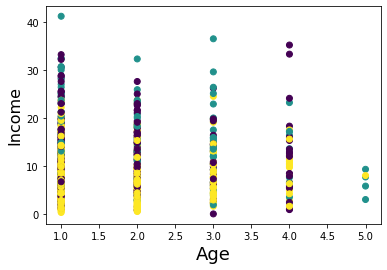

In [20]:

plt.scatter(x='Edu',y='DebtIncomeRatio',data=cust_df,c=label.astype(np.float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_25668\1656809666.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\Asus\AppData\Local\Temp\ipykernel_25668\1656809666.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= label.astype(np.float))


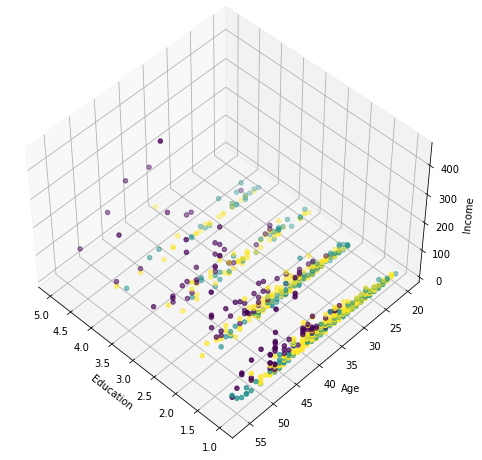

In [28]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= label.astype(np.float))